<a href="https://colab.research.google.com/github/Vaishnavi-P-Kudalkar/LocalRepo/blob/main/KMeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization: The algorithm starts by randomly selecting
𝑘
k initial centroids from the data points.
Assignment: Each data point is assigned to the nearest centroid, forming
𝑘
k clusters.
Update: The centroids of the clusters are recalculated as the mean of all data points assigned to each cluster.
Repeat: Steps 2 and 3 are repeated until the centroids no longer change significantly, or a maximum number of iterations is reached. This is known as convergence.
During each iteration, the centroids are updated based on the mean position of the points within each cluster. This process minimizes the within-cluster sum of squares (also known as inertia or distortion), leading to more compact and well-separated clusters

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')


In [ ]:
iris_df = iris_df.drop(columns=['petal length (cm)', 'petal width (cm)'])
iris_df

KeyError: "['petal length (cm)', 'petal width (cm)'] not found in axis"

In [ ]:
iris_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# Scale the data
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [ ]:
# Determine the optimal number of clusters using the elbow method
sse = [] #squared sum error how many clusters is the distance the sum of square of the point to the centroid of cluster
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(iris_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

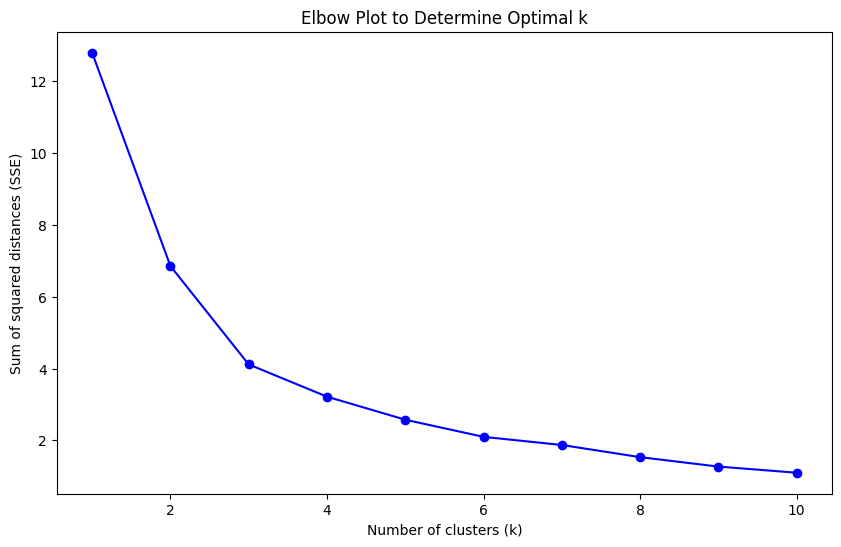

In [ ]:
# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Plot to Determine Optimal k')
plt.show()

In [ ]:
# From the elbow plot, let's choose the optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
iris_df['Cluster'] = kmeans.fit_predict(iris_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


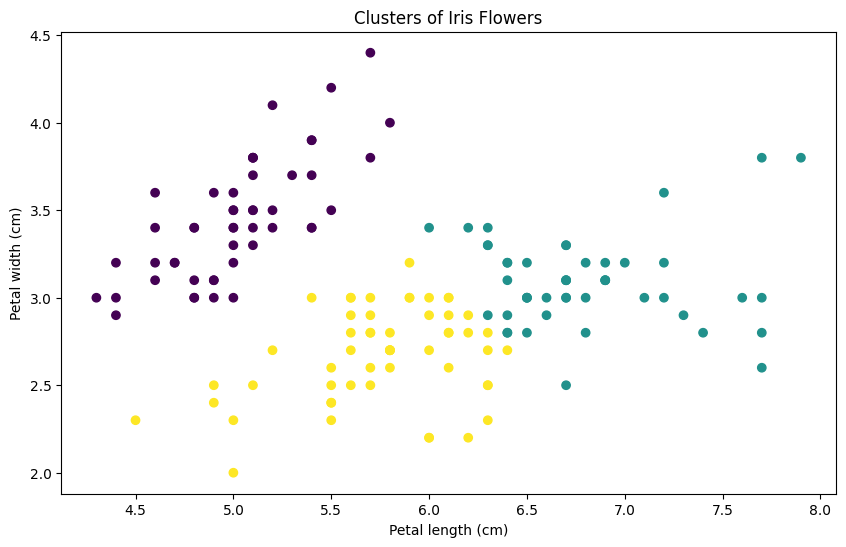

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Clusters of Iris Flowers')
plt.show()